## Assignment: CNNs for Image
Classification
#### 1. Using Python/Numpy/Tensorflow implement the LeNet5 image classification network model.
####2. Train the above model using MNIST data. Validate the model on the MNIST test data.

a. What training and validation accuracy were you able to achieve?
b. Analyze the quality of the model by comparing training and validation loss.
#### 3. Train the above model using Fashion-MNIST data. Validate the model on the
Fashion-MNIST test data.

a. What training and validation accuracy were you able to achieve?
b. Analyze the quality of the model by comparing training and validation loss.
#### 4. How can we improve the results further? Data Augmentation?
#### 5. Important Resources
a. https://www.tensorflow.org/tutorials/images/classification

b. https://www.tensorflow.org/versions/r2.1/api_docs/python/tf/keras/datasets/mnist

c. https://www.tensorflow.org/versions/r2.1/api_docs/python/tf/keras/datasets/fashion_mnist

d. https://www.tensorflow.org/tutorials/images/data_augmentation

e. https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

f. https://www.wouterbulten.nl/blog/tech/data-augmentation-using-tensorflow-data-dataset/

### Image Classification using LeNet CNN

MNIST Dataset - Handwritten Digits (0-9)

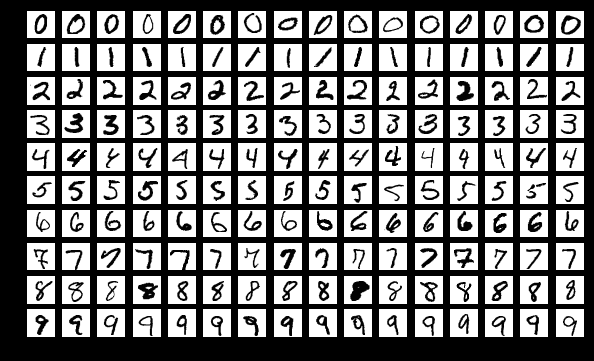

### Importing libraries

In [1]:
#Importing necessary libraries
import tensorflow as tf
import numpy as np
import keras

Using TensorFlow backend.


### Load data

In [2]:
#Loading the data
print("Downloading MNIST dataset...")
(trainData, trainLabels), (testData, testLabels) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Data preparation

In [3]:
#Parameters for the MNIST data set
num_classes = 10
image_width = 28
image_height = 28
image_channels = 1

In [4]:
#Shaping the input data 
trainData = trainData.reshape(
        (trainData.shape[0], image_height, image_width, image_channels))
testData = testData.reshape(
        (testData.shape[0], image_height, image_width, image_channels))

In [5]:
#Converting to floating point and scaling the data to the range of [0.0, 1.0]
trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0

In [6]:
#Padding the data for the model
trainData = np.pad(trainData, ((0,0),(2,2),(2,2),(0,0)), 'constant')
testData = np.pad(testData, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [7]:
#Displaying data dimensions
print("Training Data:", trainData.shape)
print("Training Labels:", trainLabels.shape)
print("Testing Data:", testData.shape)
print("Testing Labels:", testLabels.shape)

Training Data: (60000, 32, 32, 1)
Training Labels: (60000,)
Testing Data: (10000, 32, 32, 1)
Testing Labels: (10000,)


In [8]:
#Parameters for the training data set
num_classes = 10
image_width = 32
image_height = 32
image_channels = 1

### Building the Le-Net5 model

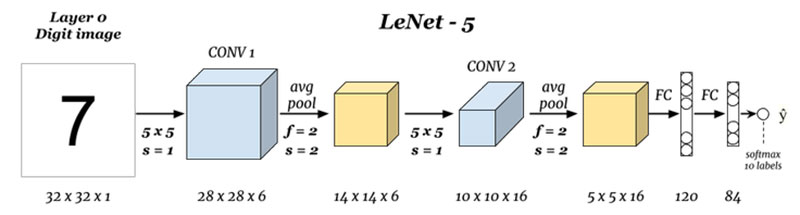

In [9]:
#Importing libraries
from tensorflow.keras import backend
from tensorflow.keras import models
from tensorflow.keras import layers

#Defining the model as a class
class LeNet:
    @staticmethod
    def init(numChannels, imgRows, imgCols, numClasses, weightsPath=None):
        #Update the input shape if wusing "channels first"
        if backend.image_data_format() == "channels_first":
            inputShape = (numChannels, imgRows, imgCols)
        else:  #"Channels last"
            inputShape = (imgRows, imgCols, numChannels)

        #INPUT => CONV => TANH => AVG-POOL => CONV => TANH => AVG-POOL => FC => TANH => FC => TANH => FC => SMAX
        #Initialize the model
        model = models.Sequential()

        #Layer 1
        model.add(layers.Conv2D(filters=6, kernel_size=(5, 5), strides=(1, 1),
                padding="valid", activation=tf.nn.tanh, input_shape=inputShape))
        model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

        #Layer 2
        model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), strides=(1, 1),
                padding="valid", activation=tf.nn.tanh))
        model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

        #Flatten the layers to fully connected layers
        model.add(layers.Flatten())
        model.add(layers.Dense(units=120, activation=tf.nn.tanh))
        model.add(layers.Dense(units=84, activation=tf.nn.tanh))

        #Final Softmax classifier
        model.add(layers.Dense(units=numClasses, activation=tf.nn.softmax))

        #Load the weights for a pre-trained model if weights path is supplied
        if weightsPath is not None:
            model.load_weights(weightsPath)

        #Return the constructed model architecture
        return model


In [10]:
#Initialize the model
print("Compiling the model...")
model = LeNet.init(numChannels=image_channels,
                    imgRows=image_height, imgCols=image_width,
                    numClasses=num_classes,
                    weightsPath=None)

#Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.01),  # Stochastic Gradient Descent
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

#Print model summary
model.summary()

Compiling the model...
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (Non

### Training the model

In [11]:
#Defining a callback to stop training if desired accuracy is achieved
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if(logs.get('accuracy') > 0.99):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

#Initialize for training
batch_size = 120
epochs = 100

history = model.fit(x=trainData, y=trainLabels, validation_data=(testData, testLabels),
        batch_size=batch_size, epochs=epochs, callbacks=[myCallback()])

Epoch 1/100
500/500 [==============================] - 3s 7ms/step - loss: 1.1281 - accuracy: 0.7196 - val_loss: 0.5397 - val_accuracy: 0.8667
Epoch 2/100
500/500 [==============================] - 3s 6ms/step - loss: 0.4637 - accuracy: 0.8755 - val_loss: 0.3843 - val_accuracy: 0.8943
Epoch 3/100
500/500 [==============================] - 3s 6ms/step - loss: 0.3663 - accuracy: 0.8965 - val_loss: 0.3237 - val_accuracy: 0.9089
Epoch 4/100
500/500 [==============================] - 3s 6ms/step - loss: 0.3182 - accuracy: 0.9081 - val_loss: 0.2860 - val_accuracy: 0.9179
Epoch 5/100
500/500 [==============================] - 3s 6ms/step - loss: 0.2852 - accuracy: 0.9168 - val_loss: 0.2586 - val_accuracy: 0.9262
Epoch 6/100
500/500 [==============================] - 3s 6ms/step - loss: 0.2591 - accuracy: 0.9242 - val_loss: 0.2356 - val_accuracy: 0.9328
Epoch 7/100
500/500 [==============================] - 3s 6ms/step - loss: 0.2371 - accuracy: 0.9311 - val_loss: 0.2152 - val_accuracy: 0.9370

### Evaluation and results of the model

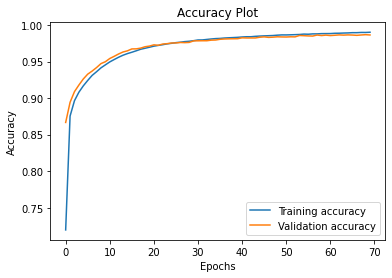

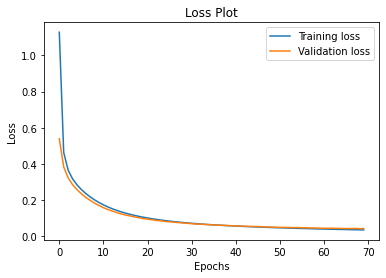

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

#Get evaluation details
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

#Accuracy
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Plot")
plt.legend(loc='best')
plt.show()

#Loss
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Plot")
plt.legend(loc='best')
plt.show()

Thus, we can see the loss converges well, and the model is not overfitting.

**Test Set Evaluation**

In [17]:
print("Evaluating...")
(loss, accuracy) = model.evaluate(testData, testLabels,
                                  batch_size=batch_size)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Evaluating...
84/84 [==============================] - 0s 4ms/step - loss: 0.0432 - accuracy: 0.9864
Accuracy: 98.64%
